## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)

In [3]:
Y = -2*X + 1

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def BatchGD(X,Y,alpha=0.0001,max_iter=1000,tol=5):
    
    #Defining Model Parameters
    theta_0 = 0
    theta_1 = 0
    
    #Defining Hyper and Other Parameters
    alpha = alpha

    m = X.shape[0]
    tol = tol

    #Calculations
    h = theta_0 + theta_1*X
    j =(1/2)*((h - Y)**2).mean()
    j_diff_theta_0 = ((h - Y)).mean()
    j_diff_theta_1 = ((h - Y) * X).mean()
    theta_0 -= alpha*j_diff_theta_0
    theta_1 -= alpha*j_diff_theta_1
    
    #Iterations
    counter = 1
    list_j = [j]
    list_0 = [theta_0]
    list_1 = [theta_1]
    list_h = [h]

    while counter < max_iter:
        h = theta_0 + theta_1*X
        j_old = j
        j =(1/2)*((h - Y)**2).mean()
        if abs(j - j_old) < 10**-tol:
            break
        j_diff_theta_0 = ((h - Y)).mean()
        j_diff_theta_1 = ((h - Y) * X).mean()
        theta_0 -= alpha*j_diff_theta_0
        theta_1 -= alpha*j_diff_theta_1
        list_j.append(j)
        list_0.append(theta_0)
        list_1.append(theta_1)
        list_h.append(h)
        counter += 1
    return list_0,list_1,list_j,list_h,theta_0,theta_1,counter

#### Try your function with any input parameterss of your choice.

In [5]:
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = BatchGD(X,Y,alpha=0.0001,max_iter=1000,tol=5)

#### Calculate r2 score

In [6]:
r2_score(Y, list_h[-1])

0.9976450071305046

#### Plot loss vs. epochs

560


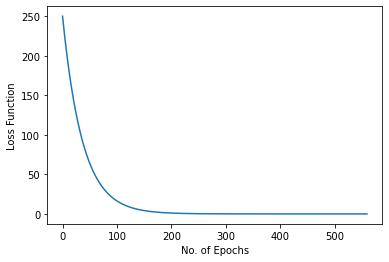

In [7]:
print(epochs)
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

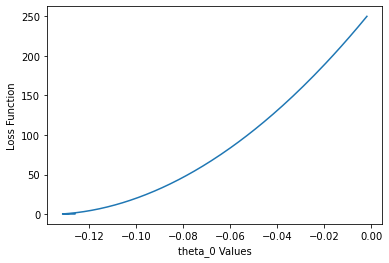

In [8]:
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()

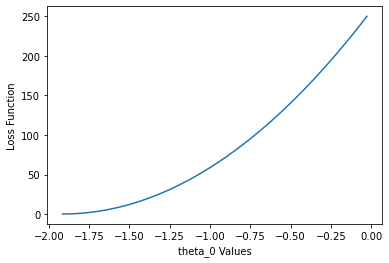

In [9]:
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()

#### Plot all regression lines till converge

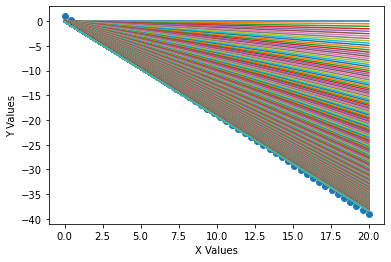

In [10]:
plt.scatter(X,Y)
for i in range(0,len(list_h)):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

#### Plot the best regression line

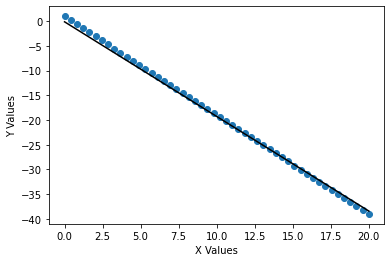

In [11]:
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [12]:
def Mini_BatchGD(X,Y,alpha=0.0001,max_iter=1000,tol=5,chunkSize=1):
    
    #Defining Model Parameters
    theta_0 = 0
    theta_1 = 0
    
    #Defining Hyper and Other Parameters
    alpha = alpha

    m = X.shape[0]
    tol = tol
    
    n = (m//chunkSize)
    #Calculations
    
    
    #Iterations
    counter = 0
    list_j = [500000000000]
    list_0 = []
    list_1 = []
    list_h = []
    list_h_mini_for = []
    
    while counter < max_iter:
        list_h_mini_for = [] 
        for i in range(n):
            
            mini_feature_X = X[0+(chunkSize*i):chunkSize*(i+1)]
            mini_feature_Y = Y[0+(chunkSize*i):chunkSize*(i+1)]
            h = theta_0 + theta_1*mini_feature_X
            j =(1/2)*(((h - mini_feature_Y)**2).mean())
            j_diff_theta_0 = ((h - mini_feature_Y)).mean()
            j_diff_theta_1 = ((h - mini_feature_Y) * mini_feature_X).mean()
            theta_0 -= alpha*j_diff_theta_0
            theta_1 -= alpha*j_diff_theta_1
            for i in h:
                list_h_mini_for.append(i)
            
        
        list_j.append(j)
        list_0.append(theta_0)
        list_1.append(theta_1)
        list_h.append(list_h_mini_for)
        counter += 1
        
        if abs(list_j[-1]-list_j[-2]) < 10**-tol:
            break
        
    
    return list_0,list_1,list_j[1:],list_h,theta_0,theta_1,counter

In [21]:
list_0_mini,list_1_mini,list_j_mini,list_h_mini,theta_0_mini,theta_1_mini,epochs_mini = Mini_BatchGD(X,Y,alpha=0.001,max_iter=200,tol=5,chunkSize=10)

In [22]:
r2_score(Y, list_h_mini[-1])
#print(list_0_mini,"\n",list_1_mini,"\n",list_j_mini,"\n",list_h_mini,"\n",theta_0_mini,"\n",theta_1_mini,"\n",epochs_mini,"\n")

0.9984741127747587

200


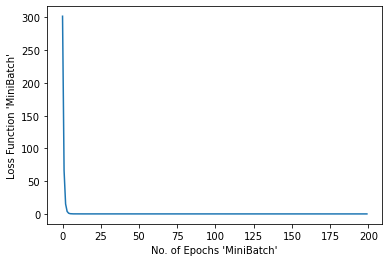

In [23]:
print(epochs_mini)
plt.plot(list_j_mini)
plt.ylabel("Loss Function 'MiniBatch'")
plt.xlabel("No. of Epochs 'MiniBatch'")
plt.show()

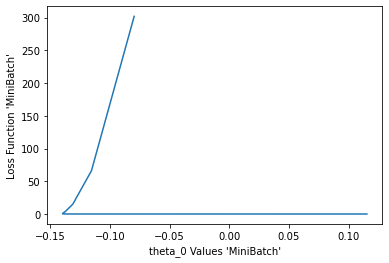

In [24]:
plt.plot(list_0_mini,list_j_mini)
plt.ylabel("Loss Function 'MiniBatch'")
plt.xlabel("theta_0 Values 'MiniBatch'")
plt.show()

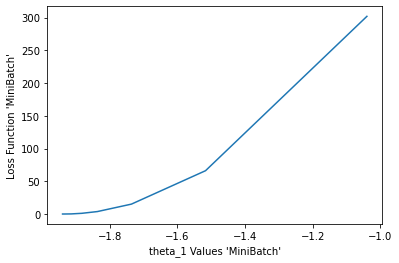

In [25]:
plt.plot(list_1_mini,list_j_mini)
plt.ylabel("Loss Function 'MiniBatch'")
plt.xlabel("theta_1 Values 'MiniBatch'")
plt.show()

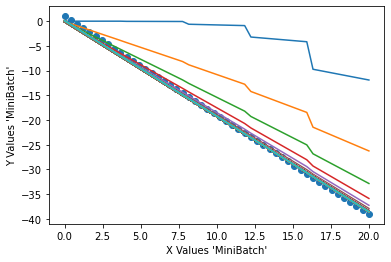

In [26]:
plt.scatter(X,Y)
for i in range(0,len(list_h_mini)):
    plt.plot(X,list_h_mini[i])
plt.ylabel("Y Values 'MiniBatch'")
plt.xlabel("X Values 'MiniBatch'")
plt.show()

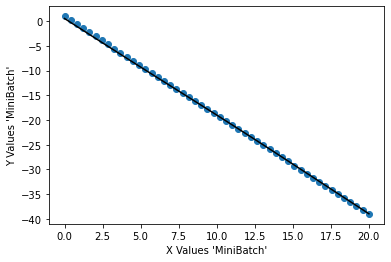

In [19]:
plt.scatter(X,Y)
plt.plot(X,list_h_mini[-1],color="black")
plt.ylabel("Y Values 'MiniBatch'")
plt.xlabel("X Values 'MiniBatch'")
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [ ]:
#stochastic will be the same as mini batch but with chunk size = 1

In [20]:
print("======================")
    print("Final Cost Function Value: "+str(j))
    print("Final Model Parameters Vector'Theta': "+str(theta_0)+", "+str(theta_1))
    print("No. of Iterations: "+str(counter))
    print("======================")
    #Evaluating The Model
    s = r2_score(Y, h)
    print("The R2Score of The Model: "+str(s))
    print("======================")

    #visualizing CF with Iterations
    plt.plot(list_j)
    plt.ylabel("CF_Multi")
    plt.xlabel("No. of Iterations")
    plt.show()
    print("======================")
    #Visualizing your Model
    #ax = range(0,15)
    plt.scatter(X,Y)
    plt.plot(X,h)

    plt.show()
#     ax = range(0,15)
#     plt.scatter(X,Y)

#     plt.plot(X,list_0[0]+list_1[0]*X,label="No. of Iteration= 0")
#     plt.plot(X,list_0[300]+list_1[300]*X,label="No. of Iteration= 300")
#     plt.plot(X,list_0[600]+list_1[600]*X,label="No. of Iteration= 600")
#     plt.plot(X,theta_0+theta_1*X,label=f"No. of Iteration= {counter}",linewidth=4.0)
#     plt.legend()

#     plt.show()

IndentationError: unexpected indent (<ipython-input-20-b3c03967120a>, line 2)